<a href="https://colab.research.google.com/github/manon306/-/blob/main/Regression%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  **Regression**

1- IMPORT Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Data preprocessing

1- Read data  
2-get all information about data  
3-check Missing values  
4- handle Missing  
5- check duplicates  
6- handle duplicates  
7- Handle outliers  
8- Encode cat data


**2 - READ DATA**

In [2]:
df = pd.read_csv('./insurance.csv')

**Show data**

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,NaN,northwest,3866.85520


**Shape**

In [4]:
df.shape

(1338, 7)

**info**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1317 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Finding missing value**

In [6]:
df.isnull().sum()

age          0
sex          0
bmi          0
children     0
smoker      21
region       0
charges      0
dtype: int64

**Finding duplicates**

In [7]:
df.duplicated().sum()

np.int64(1)

**Exploratory Data Analysis**

**1- Descriptive statistics**

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [9]:
df.describe(include=['object'])

,sex,smoker,region
count,1338,1317,1338
unique,2,2,4
top,male,no,southeast
freq,676,1052,364


**Histogram to understand the distribution**

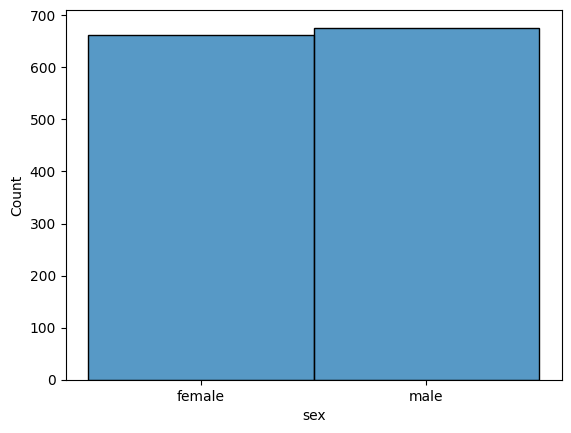

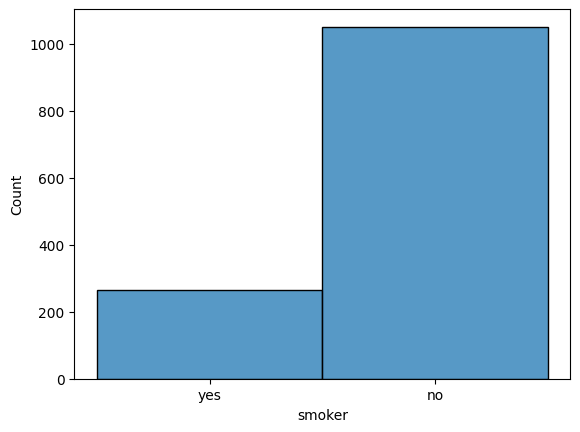

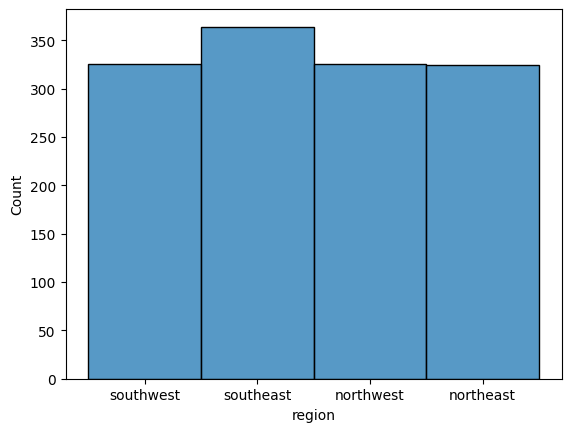

In [10]:
for i in df.select_dtypes(include=['object']).columns:
    sns.histplot(data=df, x=i)
    plt.show()

**Boxplot**

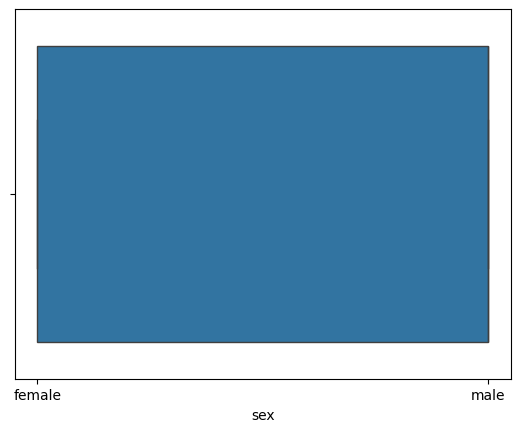

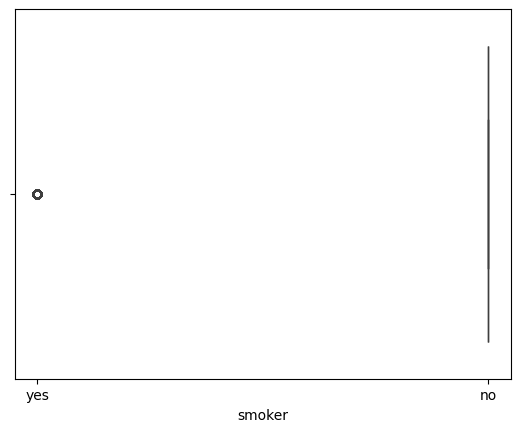

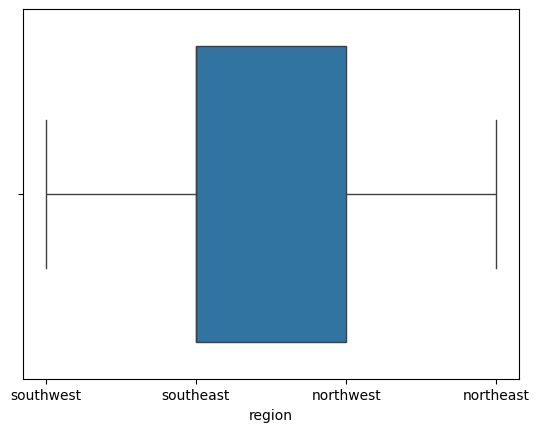

In [11]:
for i in df.select_dtypes(include=['object']).columns:
    sns.boxplot(data=df, x=i)
    plt.show()

**Scatter plot to understand the relationShip**

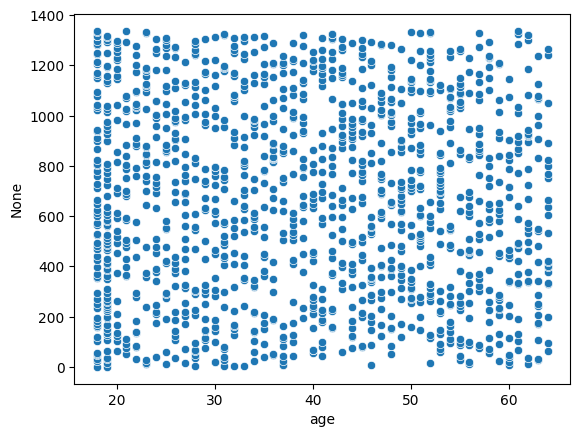

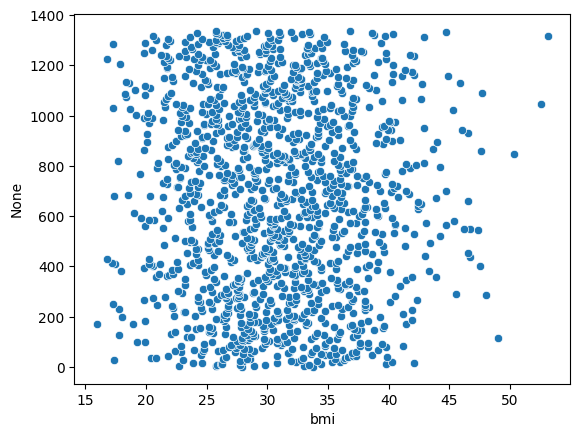

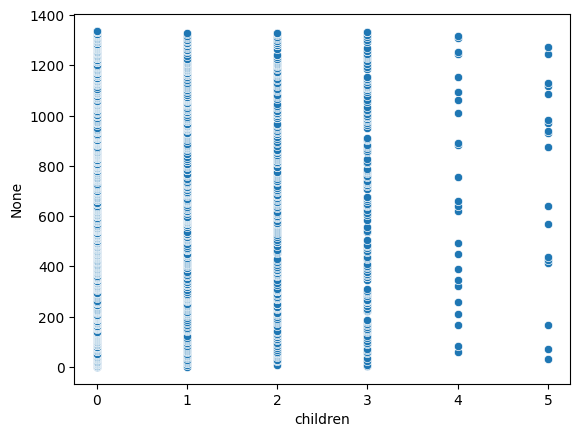

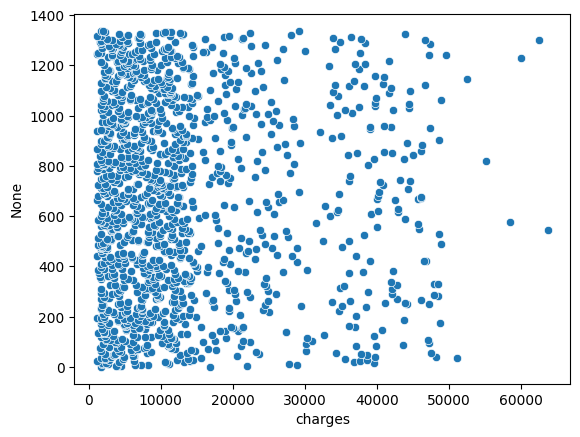

In [12]:
for i in df.select_dtypes(include="number").columns:
    sns.scatterplot(data=df, x=i, y=df.index)
    plt.show()

**Correlation with heatmap to interpret the relation and multicoliniarity**

<Axes: >

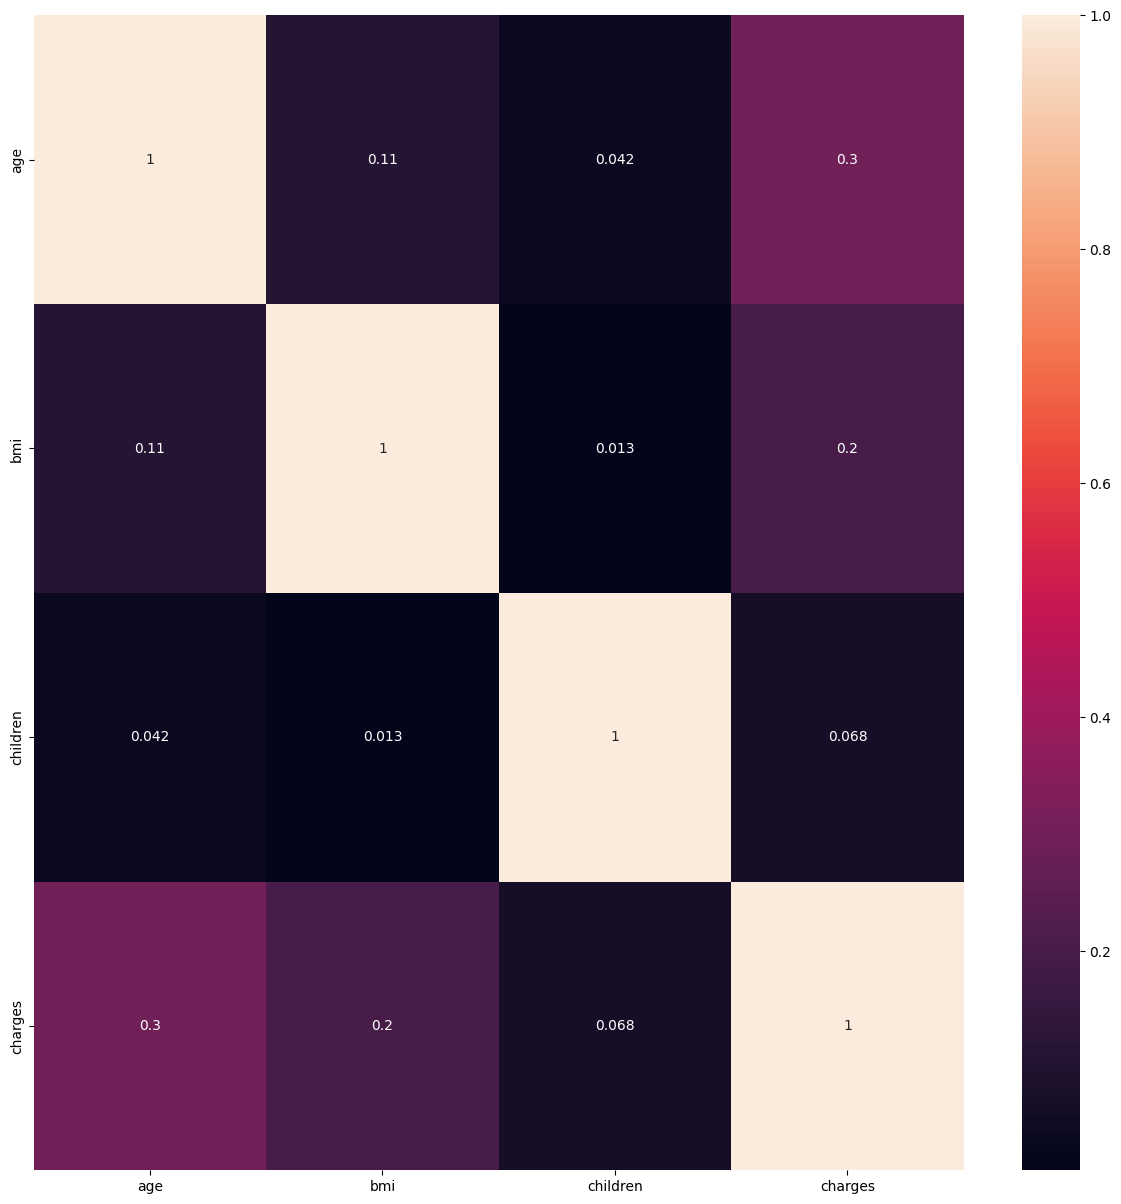

In [13]:
s= df.select_dtypes(include="number").corr()
plt.figure(figsize=(15,15))
sns.heatmap(s, annot=True)

# Missing  Value

In [14]:
# numeric
num_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
# categorical
cat_features = df.select_dtypes(include=['object']).columns.tolist()

num_imputer = SimpleImputer(strategy='mean')
df[num_features] = num_imputer.fit_transform(df[num_features])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_features] = cat_imputer.fit_transform(df[cat_features])

print("\nMissing values after imputation:\n", df.isnull().sum())


Missing values after imputation:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [15]:
ohe = OneHotEncoder(drop='first', sparse_output=False)
cat_encoded = pd.DataFrame(ohe.fit_transform(df[cat_features]), columns=ohe.get_feature_names_out(cat_features))
df = pd.concat([df.drop(columns=cat_features), cat_encoded], axis=1)
print("Shape after encoding:", df.shape)

Shape after encoding: (1338, 9)


**Feature Scaling (numeric)**

In [16]:
# scaler = StandardScaler()
# df[num_features] = scaler.fit_transform(df[num_features])


**Prepare X, y and Split Dataset**

In [17]:
X = df.drop(columns=['charges'])
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")

X_train: (1070, 8), X_test: (268, 8)


_Feature Scaling (Standardization)_

- Feature scaling is an important preprocessing step to ensure that all numerical features
  have the same scale. This helps machine-learning models perform better, especially
  distance-based models and gradient-based algorithms.

Steps Performed:

1- Choose the numeric columns that need scaling

2- Create a StandardScaler object
StandardScaler transforms values so that each feature has:

Mean = 0

Standard deviation = 1

3- Fit the scaler on the training data and transform it
The scaler learns the distribution (mean & std) from training data only.

4- Transform the test data using the same scaler
We apply the same scaler to test data without fitting again
to avoid data leakage.



In [18]:
col_for_scaling=['age', 'bmi', 'children']
scaler = StandardScaler()
X_train[col_for_scaling] = scaler.fit_transform(X_train[col_for_scaling])
X_test[col_for_scaling] = scaler.transform(X_test[col_for_scaling])



# **Models**

## **Linear regression**

In [19]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [20]:
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("\nLinear Regression Evaluation")
print(f"R2: {r2_lr:.4f}, MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}")


Linear Regression Evaluation
R2: 0.7618, MAE: 4332.43, RMSE: 6081.66


#  **Random Forest Regression**

In [21]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [22]:
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("\nRandom Forest Evaluation")
print(f"R2: {r2_rf:.4f}, MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}")


Random Forest Evaluation
R2: 0.8295, MAE: 2884.77, RMSE: 5144.52


**ِActual vs Prediction**

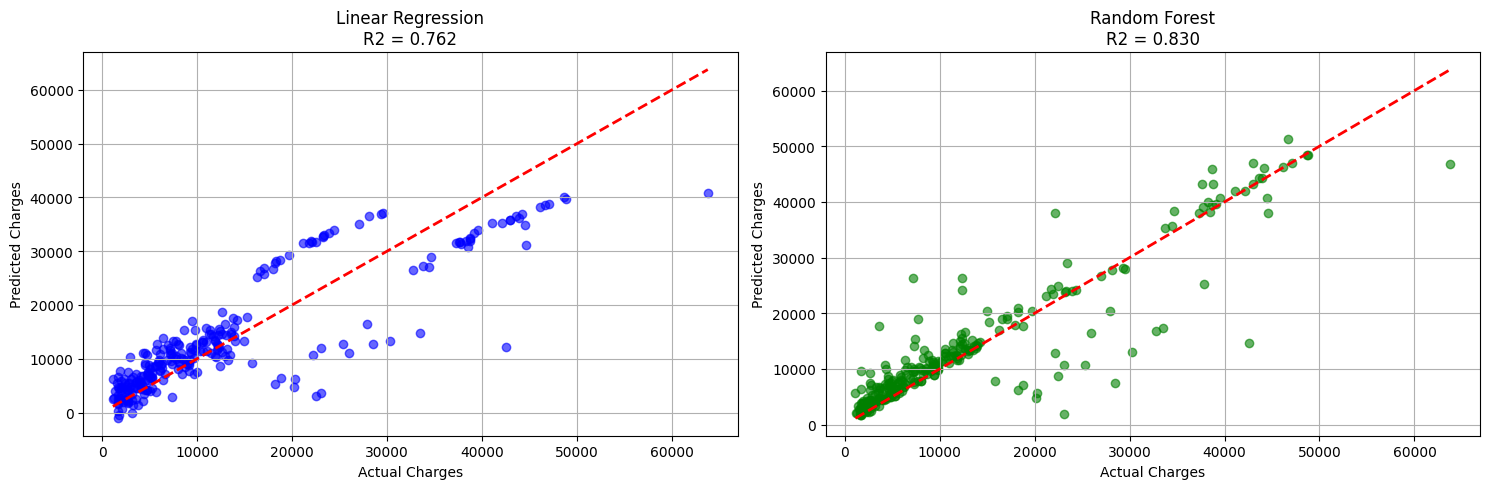

In [23]:
plt.figure(figsize=(15,5))

# Linear Regression
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Linear Regression\nR2 = {r2_lr:.3f}')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)

# Random Forest
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Random Forest\nR2 = {r2_rf:.3f}')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid(True)

plt.tight_layout()
plt.show()

Comparison Table:


,Model,R2,MAE,RMSE
0,Linear Regression,0.761759,4332.434504,6081.657964
1,Random Forest,0.829524,2884.766969,5144.523575


✅ Best Model: Random Forest


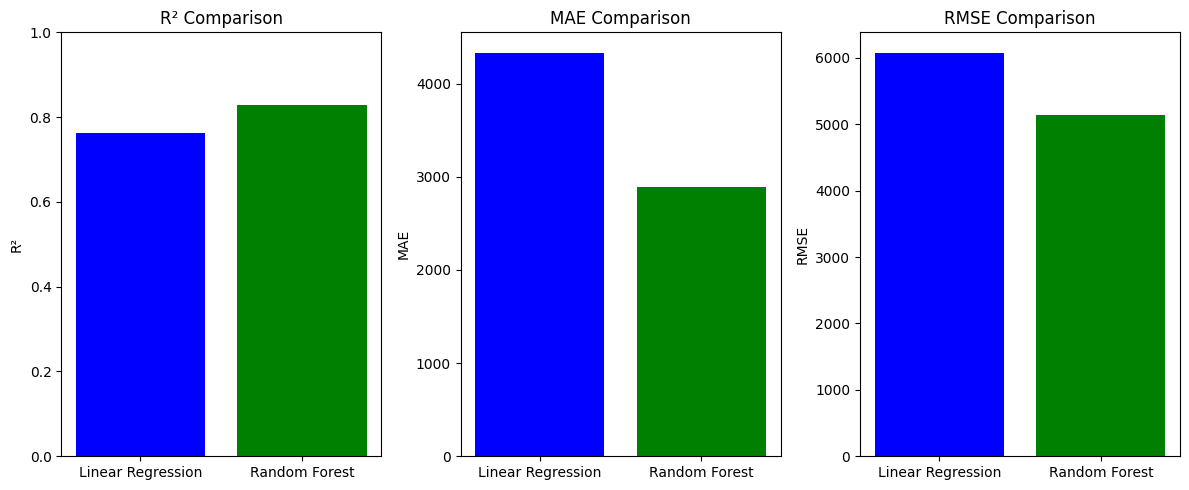

In [24]:
# %% [markdown]
# ### Comparison between Linear Regression and Random Forest

# %%
# إنشاء جدول مقارنة
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R2': [r2_lr, r2_rf],
    'MAE': [mae_lr, mae_rf],
    'RMSE': [rmse_lr, rmse_rf]
})

print("Comparison Table:")
display(comparison_df)

# %%
# اختيار أفضل نموذج بناءً على R2 الأعلى و MAE, RMSE الأقل
best_model = 'Linear Regression' if r2_lr > r2_rf else 'Random Forest'
print(f"✅ Best Model: {best_model}")

# %%
# رسم المقارنة
plt.figure(figsize=(12,5))

# R2
plt.subplot(1,3,1)
plt.bar(comparison_df['Model'], comparison_df['R2'], color=['blue','green'])
plt.title('R² Comparison')
plt.ylabel('R²')
plt.ylim(0,1)

# MAE
plt.subplot(1,3,2)
plt.bar(comparison_df['Model'], comparison_df['MAE'], color=['blue','green'])
plt.title('MAE Comparison')
plt.ylabel('MAE')

# RMSE
plt.subplot(1,3,3)
plt.bar(comparison_df['Model'], comparison_df['RMSE'], color=['blue','green'])
plt.title('RMSE Comparison')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()


In [26]:
print("\n" + "="*50)
print("ACTUAL VS PREDICTED")
print("="*50)

comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted_RF': y_pred_rf
})

print("First 10 predictions comparison:")
print(comparison_df.head(10))


ACTUAL VS PREDICTED
First 10 predictions comparison:
           Actual  Predicted_RF
764    9095.06825  10009.831900
887    5272.17580   5213.092565
890   29330.98315  28103.479320
1293   9301.89355  11220.068730
259   33750.29180  35256.162211
1312   4536.25900   8143.291172
899    2117.33885   3108.763753
752   14210.53595  14822.496322
1286   3732.62510   6507.835041
707   10264.44210  11458.569089


# Finally , we suggest to use Random Forest

Predict New Insurance Charges – Steps

- Step 1: Define numeric and categorical features (must match training data).

- Step 2: Get input for a new customer (or use sample data).

- Step 3: Create a DataFrame with proper columns.

- Step 4: Convert numeric columns and handle missing values.

- Step 5: Encode categorical features with the trained OneHotEncoder.

- Step 6: Combine numeric and encoded categorical features.

- Step 7: Ensure column order matches the training data.

- Step 8: Scale numeric features with the same scaler.

- Step 9: Predict subscription using the trained Random Forest model.

- Step 10: Display prediction, probability, and recommendation.


In [ ]:
num_features=['age', 'bmi', 'children']
cat_features = [col for col in X.columns if col not in num_features]
sample_input = "19,female,27.9,0,yes,southwest"
while True:
    row_input = input("Enter customer features (6 values, comma-separated) or press Enter to use sample: ")
    
    if row_input.strip() == "":
        print(" No input entered! Using sample data...")
        values = sample_input.split(",")
        break
    else:
        values = row_input.strip().split(",")
        if len(values) != 6:
            print(f" Expected 6 values, got {len(values)}. Please try again.\n")
            continue
        break
columns= ['age','sex','bmi','children','smoker','region']
new_data = pd.DataFrame([values], columns=columns)
new_data[num_features] = new_data[num_features].apply(pd.to_numeric, errors="coerce")

# Handle missing numeric values
for col in num_features:
    if pd.isna(new_data[col].iloc[0]):
        new_data[col] = X_train[col].mean()

print("\nCategorical Inputs:")
print("sex:", new_data['sex'].iloc[0])
print("smoker:", new_data['smoker'].iloc[0])
print("region:", new_data['region'].iloc[0])


# Encoding categorical
new_cat_encoded = ohe.transform(new_data[['sex','smoker','region']])
new_cat_encoded_df = pd.DataFrame(
    new_cat_encoded,
    columns=ohe.get_feature_names_out(['sex','smoker','region'])
)

# Combine
new_final = pd.concat(
    [new_data[num_features].reset_index(drop=True),
    new_cat_encoded_df.reset_index(drop=True)],
    axis=1
)

# Match columns
new_final = new_final.reindex(columns=X_train.columns, fill_value=0)

# Scaling
new_final[col_for_scaling] = scaler.transform(new_final[col_for_scaling])

# Prediction
prediction = rf_model.predict(new_final)

print("Predicted Insurance Charges:")
print(prediction[0])



Categorical Inputs:
sex: female
smoker: yes
region: southwest

💰 Predicted Insurance Charges:
17071.69083380006
